<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 4

# Question 1 

Try to denoise the image (ex2n.png) by implementing a blur with an FFT.

The image (ex2n.png) is blurred by a horizontal noise. This question is asking you to remove the noise by FFT. 


Text(0.5, 1.0, 'Original image')

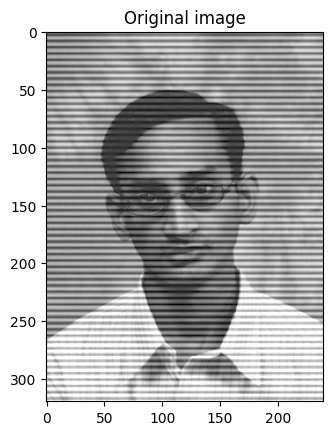

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy.fft import fft2,ifft2,fftshift,ifftshift


def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

    
    
im = plt.imread('ex2n.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

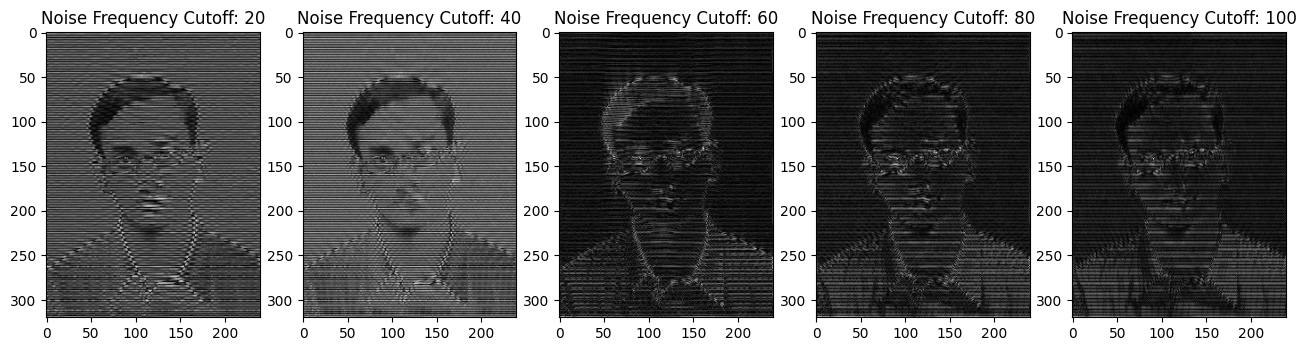

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib.colors import LogNorm

def denoise_image_with_frequencies(im, start_freq, end_freq, step_freq):
    # Perform 2D FFT
    im_fft = fftshift(fft2(im))

    # Create a list of different frequency cutoffs
    noise_frequencies = np.arange(start_freq, end_freq + step_freq, step_freq)

    # Create subplots for each denoised image
    plt.figure(figsize=(16, 4))
    for i, noise_freq in enumerate(noise_frequencies):
        # Create a mask to filter out noise frequencies
        rows, cols = im.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.ones((rows, cols), np.uint8)
        r = noise_freq  # Radius of the mask, represents the cutoff frequency
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
        mask[mask_area] = 0

        # Apply the mask to the spectrum
        im_fft_denoised = im_fft * mask

        # Perform Inverse FFT to obtain the denoised image
        im_denoised = np.abs(ifft2(ifftshift(im_fft_denoised)))

        # Display the denoised image
        plt.subplot(1, len(noise_frequencies), i+1)
        plt.imshow(im_denoised, cmap=plt.cm.gray)
        plt.title(f'Noise Frequency Cutoff: {noise_freq}')

    plt.show()

# Load the image
im = plt.imread('ex2n.png').astype(float)

# Specify start, end, and step for the frequency cutoffs
start_freq = 20
end_freq = 100
step_freq = 20

# Call the function to denoise the image with specified frequency cutoffs
denoise_image_with_frequencies(im, start_freq, end_freq, step_freq)


# Question 2

Try to denoise the image (ex2n.png) by implementing a blur with 2D multilevel Discrete wavelet transform.

The image (ex2n.png) is blurred by a horizontal noise. This question is asking you to remove the noise by 2D multilevel Discrete wavelet transform. 


Text(0.5, 1.0, 'Original image')

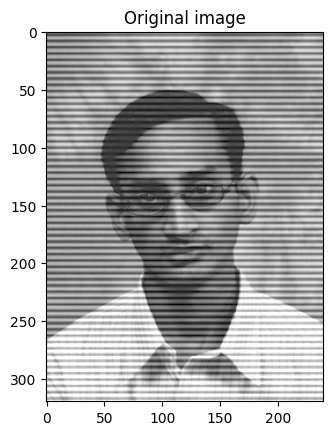

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt


im = plt.imread('ex2n.png').astype(float)


plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

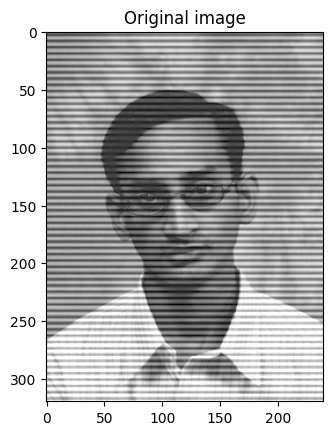

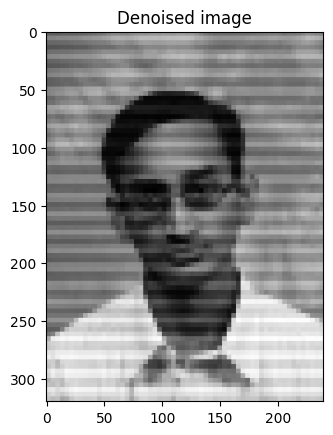

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt

# Load the noisy image
im = plt.imread('ex2n.png').astype(float)


coeffs3 = pywt.wavedec2(im, 'haar')
coeffs3[-1] = tuple([np.zeros_like(v) for v in coeffs3[-1]])
coeffs3[-2] = tuple([np.zeros_like(v) for v in coeffs3[-2]])
imw=pywt.waverec2(coeffs3, 'haar')


# Display the original image
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

# Display the denoised image
plt.figure()
plt.imshow(imw, plt.cm.gray)
plt.title('Denoised image')

# Save the denoised image
plt.imsave('denoised_image.png', imw, cmap=plt.cm.gray)



## Question 3

In this question, we are going to use FFT to approximate the derivatives of a function.

Enter

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

## Q3A


Write a generic function `get_derivative(f_values,n1,n2)` where 
- `f_values` is a 2D np.array containing the discretized values of a 2D-function `f`, 
- `n1` the order of derivative of `f` with respect to $x$ and 
- `n2` the order of derivative of `f` with respect to $y$.

It outputs the corresponding derivative using `scipy.fft`.

Namely,
$$get\_ derivative(f,n1,n2)=\frac{\partial^{n1}}{\partial x^{n1}}\frac{\partial^{n2}}{\partial y^{n2}}f(x,y).$$

You may assume the function `f` is smooth and the f_values are taken on $(-\pi,\pi)\times(-\pi,\pi)$ with $100 \times 100$ gridpoints.

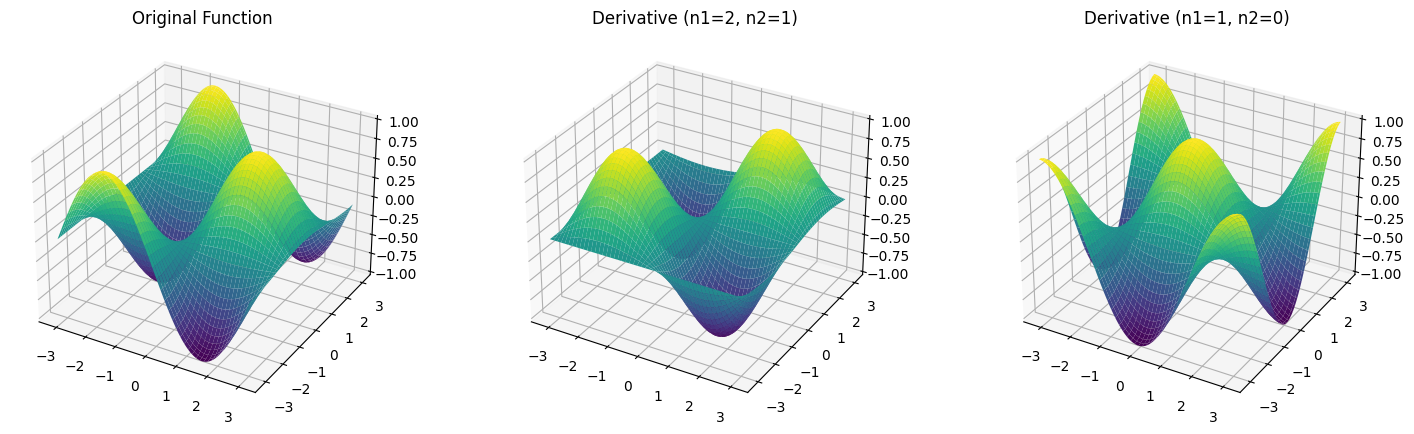

In [10]:
# answer 3a
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-np.pi, np.pi, 100,endpoint=False)
y = np.linspace(-np.pi, np.pi, 100,endpoint=False)
[U,V] = np.meshgrid(x,y)
k = np.array([range(0,50),range(-50,0)])
k_new = k.reshape(1,100).flatten()
[P,Q] = np.meshgrid(k_new,k_new)

# An example of f
def f(x, y):
    return np.sin(x) * np.cos(y)

def get_derivative(f, n1, n2):
    f_fft = fft2(f)
    f_fft = ((1j*P) ** n1) * ((1j*Q)**n2)*f_fft
    new_f = ifft2(f_fft).real
    return new_f   

# Create a grid for x and y values

X, Y = np.meshgrid(x, y)

# Calculate the original function values
f_values = f(X, Y)

# Calculate the derivatives
n1, n2 = 2, 1  # Change n1 and n2 as needed
df_dxdy = get_derivative(f_values, n1, n2)

n3, n4 = 1, 0  # Change n3 and n4 as needed
df_d2xd2y = get_derivative(f_values, n3, n4)

# Plot the original and derivative functions
fig = plt.figure(figsize=(18, 5))

# Plot original function
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.set_title('Original Function')
ax1.plot_surface(X, Y, f_values, cmap='viridis')

# Plot first derivative function
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.set_title(f'Derivative (n1={n1}, n2={n2})')
ax2.plot_surface(X, Y, df_dxdy.real, cmap='viridis')

# Plot second derivative function
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.set_title(f'Derivative (n1={n3}, n2={n4})')
ax3.plot_surface(X, Y, df_d2xd2y.real, cmap='viridis')

plt.show()


## Q3B

Now suppose `n1`= 1 and `n2`= 1. Plot two graphs:
one for approximating the mixed derivative of $f(x,y)=sin(x)cos(y)$ using `get_derivative()` and next to the true derivative given using `true_derivative()`.

The function values should be discretized on $(-\pi,\pi)\times(-\pi,\pi)$ with $100 \times 100$ gridpoints.

Plot the graphs using `plt.imshow()`.

Enter

In [8]:
def f(x,y):
    return np.sin(x)*np.cos(y)

def true_derivative(x,y):
    return -np.cos(x)*np.sin(y)


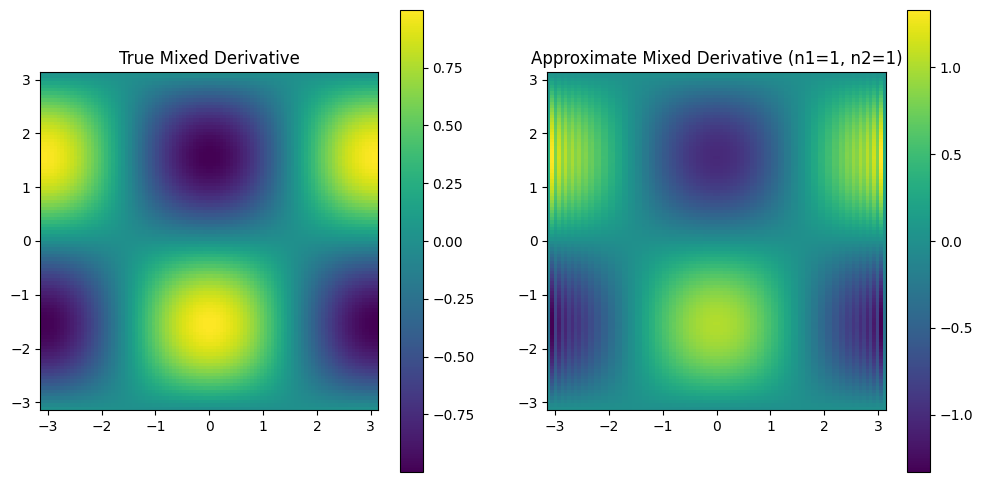

In [9]:
# answer 3b


import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x) * np.cos(y)

def true_derivative(x, y):
    return -np.cos(x) * np.sin(y)


# Create a grid for x and y values
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)

# Calculate the true mixed derivative
true_mixed_derivative = true_derivative(X, Y)

# Calculate the approximate mixed derivative using get_derivative function
n1, n2 = 1, 1
approx_mixed_derivative = get_derivative(f(X, Y), n1, n2)

# Plot the true mixed derivative
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(true_mixed_derivative, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='viridis')
plt.title('True Mixed Derivative')
plt.colorbar()

# Plot the approximate mixed derivative
plt.subplot(1, 2, 2)
plt.imshow(approx_mixed_derivative.real, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='viridis')
plt.title(f'Approximate Mixed Derivative (n1={n1}, n2={n2})')
plt.colorbar()

plt.show()